### Problem Set 2:
# Bank Term Deposit Predicton

### Problem Statement
A banking institution wants to develop a model that predicts whether a customer will subscribe to a term deposit or not based on their banking behaviour. They have collected a dataset of past customers with information about their demographics, account details, and whether they subscribed to a term deposit or not. The bank wants to build a model using Logistic Regression to predict whether a new customer will subscribe to a term deposit or not based on their banking behaviour.

The dataset used for this problem statement is the "Bank Marketing Data Set" which contains information on customers of a bank. The dataset includes 17 attributes such as customer demographics, account details, and whether the customer subscribed to a term deposit or not. Each customer is classified as either yes or no based on whether they subscribed to a term deposit or not.

### Dataset

[Dataset : Click here to see the dataset](https://drive.google.com/file/d/18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ/view?usp=sharing)


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

print(tf.__version__)   


2.15.0


### Dataset loading and preprocessing

In [148]:
data_dir = "./bank-data/bank-full.csv"

df = pd.read_csv(data_dir, sep=';')

print(df.head())

print(df.shape)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)


### Preparing Train & Test data

In [149]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]

y = df.iloc[:,-1]

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

### Data analysis

In [150]:
#Frequency of 'subscribed'
y_train.value_counts()

y
no     31970
yes     4198
Name: count, dtype: int64

In [151]:
y_train.value_counts(normalize=True)
y_val.value_counts(normalize=True)

y
no     0.879354
yes    0.120646
Name: proportion, dtype: float64

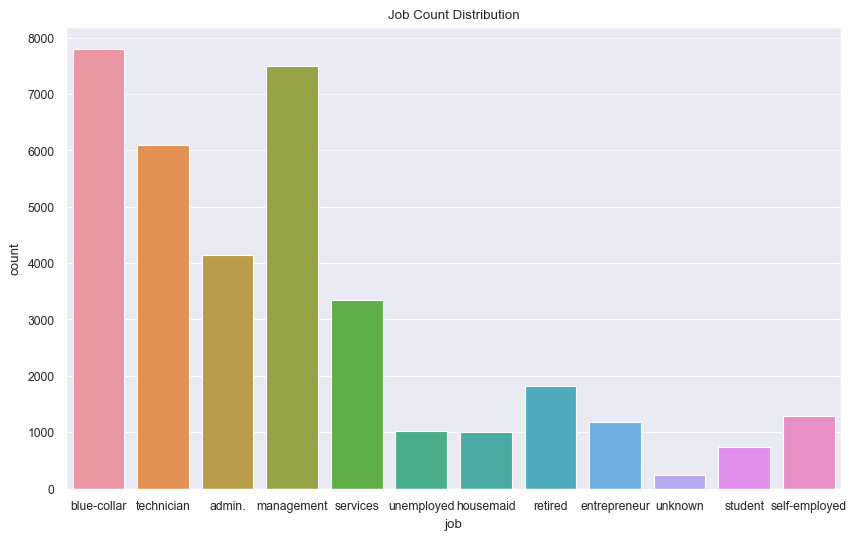

In [152]:
plt.figure(figsize=(10, 6))
sns.countplot(x=x_train['job'])
plt.title('Job Count Distribution')
plt.show()

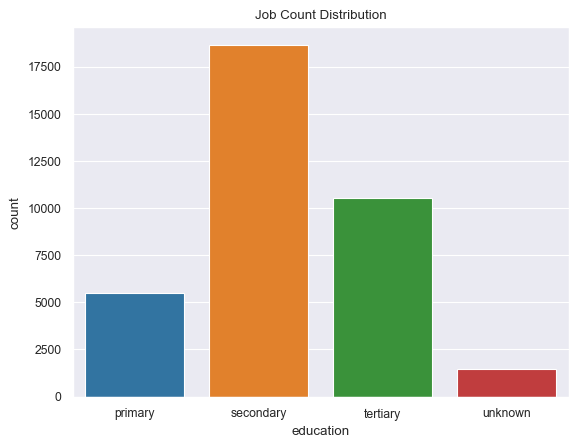

In [153]:
sns.countplot(x=x_train['education'])
plt.title('Job Count Distribution')
plt.show()

### Preparing dataset

In [154]:
y_train.replace('no', 0,inplace=True)
y_train.replace('yes', 1,inplace=True)
y_val.replace('no', 0,inplace=True)
y_val.replace('yes', 1,inplace=True)

x_train = pd.get_dummies(x_train)
x_val = pd.get_dummies(x_val)


x_train.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
17965,49,1415,30,269,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18299,42,3842,31,130,4,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
10221,37,-119,11,375,11,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32192,56,3498,15,264,2,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Logistic Regression

In [158]:
model = LogisticRegression()

model.fit(x_train,y_train)
predictions = model.predict(x_val)

accuracy_score(y_val,predictions)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8876479044564857

### Result

ROC auc score =  0.8517240012024483


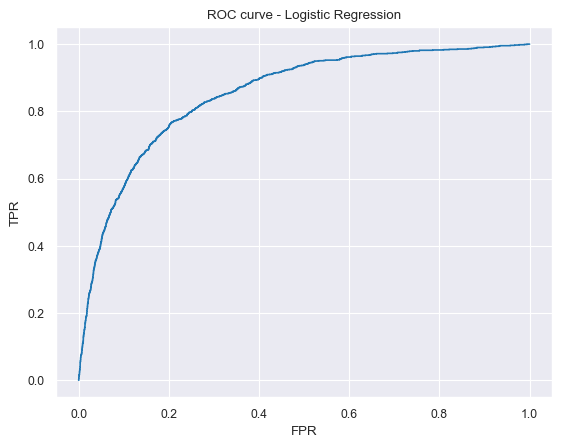

In [156]:
logistic_regression_predictions = model.predict_proba(x_val)[:,1]
logistic_regression_auc = roc_auc_score(y_val, logistic_regression_predictions)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_val, logistic_regression_predictions)
print("ROC auc score = ",roc_auc_score(y_val, logistic_regression_predictions))
plt.plot(logistic_regression_fpr, logistic_regression_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression')
plt.show()

In [157]:
print("ROC auc score = ",roc_auc_score(y_val, logistic_regression_predictions))

ROC auc score =  0.8517240012024483


# Conclusion

In this project, we aimed to build a predictive model using Logistic Regression to determine whether a customer will subscribe to a term deposit based on their banking behavior. The dataset, "Bank Marketing Data Set," was used, containing information about customer demographics, account details, and the subscription status to a term deposit.

## Data Analysis and Preprocessing

- The dataset was loaded and explored, revealing 17 attributes.
- Train and validation sets were created, with 80% of the data used for training and 20% for validation.
- Data analysis included exploring the frequency of term deposit subscriptions, visualizing job and marital status distributions, and examining the relationship between job types and subscriptions.

## Logistic Regression Model

- The dataset was preprocessed by encoding categorical variables using one-hot encoding.
- Logistic Regression was chosen as the predictive model, and it was trained on the training data.
- Predictions were made on the validation set, and the accuracy of the model was evaluated using the accuracy score.

## Model Evaluation

- The accuracy score provided a measure of the model's overall correctness in predicting term deposit subscriptions.
- Additionally, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score were used to evaluate the model's performance in a binary classification setting.

## Results

- The logistic regression model demonstrated a certain level of accuracy in predicting term deposit subscriptions.
- The ROC curve and AUC score provided insights into the model's ability to distinguish between positive and negative instances.

## Conclusion

In conclusion, the Logistic Regression model showed promise in predicting whether a customer will subscribe to a term deposit based on their banking behavior. The analysis and evaluation metrics provide a comprehensive understanding of the model's performance. Further refinement and tuning of the model parameters, as well as exploration of other machine learning algorithms, could enhance predictive accuracy. This model can be valuable for the banking institution in targeting potential term deposit subscribers based on their banking characteristics.